# Name:Roshan Kumar

Role:Data Science Intern

# Task:3 Exploratory Data Analysis - Retail

Perform ‘Exploratory Data Analysis’ on dataset
As a business manager, try to find out the weak areas where you can
work to make more profit.

In [1]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Fetching data
data=pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Feature engineering

In [3]:
data.shape

(9994, 13)

In [4]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
data['Country'].unique()

array(['United States'], dtype=object)

In [6]:
data.drop(['Postal Code','Country'],axis='columns',inplace=True)
data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Visualisation of graphs

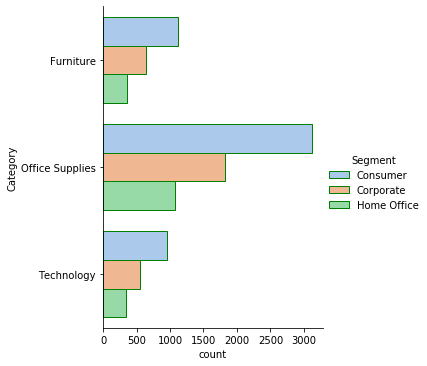

In [7]:
sns.catplot(y='Category',kind='count',data=data,hue='Segment',edgecolor='green',palette='pastel')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

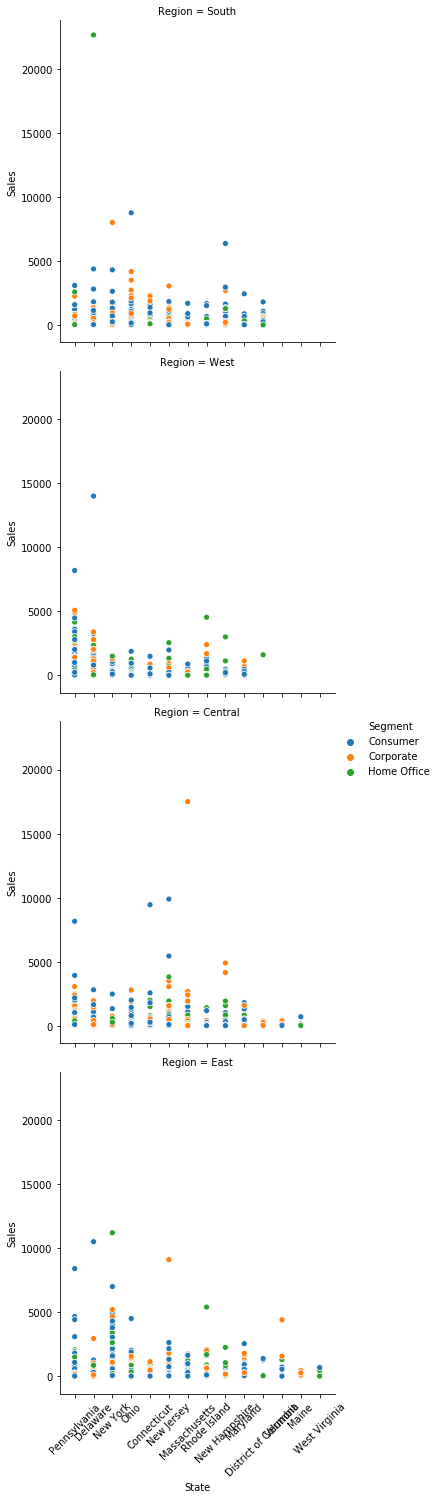

In [8]:
sns.relplot(x='State',y='Sales',data=data,hue='Segment',row='Region')
plt.xticks(rotation=45)

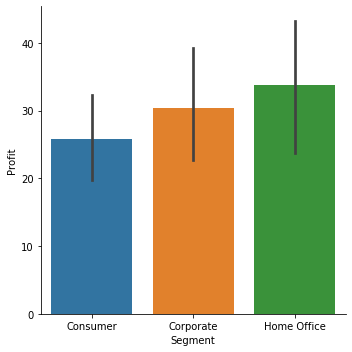

In [9]:
sns.catplot(x='Segment',y='Profit',kind='bar',data=data)

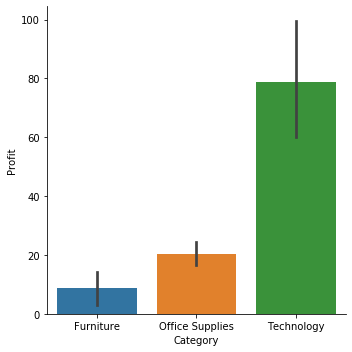

In [10]:
sns.catplot(x='Category',y='Profit',kind='bar',data=data)

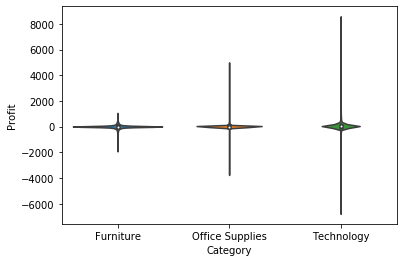

In [11]:
sns.violinplot(x=data.Category,y=data.Profit)

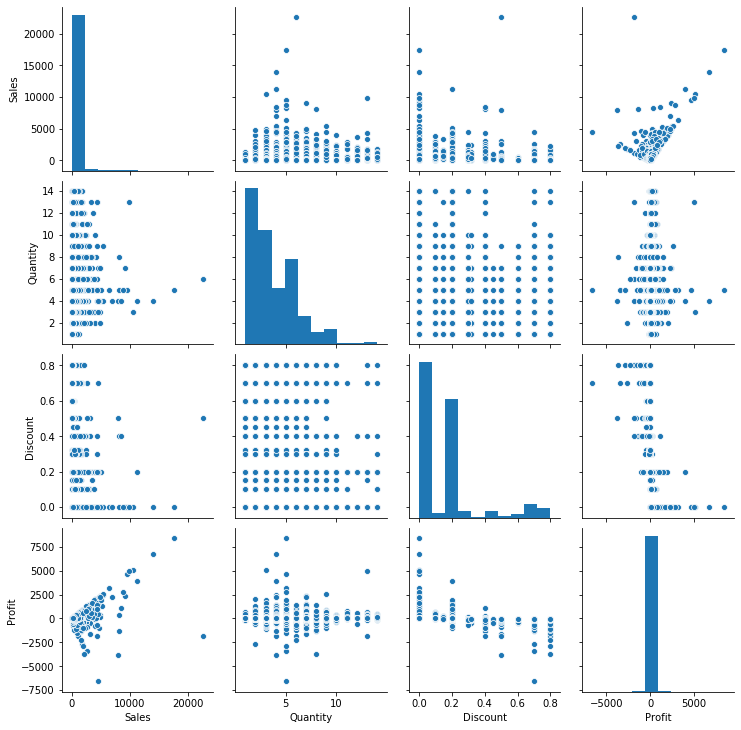

In [12]:
sns.pairplot(data)

# grouping the data into groups

In [13]:
Area=data.groupby(["City","State"])

In [14]:
Area.sum()

,,Sales,Quantity,Discount,Profit
City,State,,,,
Aberdeen,South Dakota,25.500,3,0.0,6.6300
Abilene,Texas,1.392,2,0.8,-3.7584
Akron,Ohio,2729.986,65,7.5,-186.6356
Albuquerque,New Mexico,2220.160,65,0.8,634.0881
Alexandria,Virginia,5519.570,84,0.0,318.6183
...,...,...,...,...,...
Woonsocket,Rhode Island,195.550,15,0.0,78.6791
Yonkers,New York,7657.666,57,1.0,2767.7557
York,Pennsylvania,817.978,19,2.1,-102.1692


In [15]:
sector=data.groupby(["Category","Sub-Category"])

In [16]:
sector.sum()

Sales  Quantity  Discount      Profit
Category        Sub-Category                                             
Furniture       Bookcases     114879.9963       868     48.14  -3472.5560
                Chairs        328449.1030      2356    105.00  26590.1663
                Furnishings    91705.1640      3563    132.40  13059.1436
                Tables        206965.5320      1241     83.35 -17725.4811
Office Supplies Appliances    107532.1610      1729     77.60  18138.0054
                Art            27118.7920      3000     59.60   6527.7870
                Binders       203412.7330      5974    567.00  30221.7633
                Envelopes      16476.4020       906     20.40   6964.1767
                Fasteners       3024.2800       914     17.80    949.5182
                Labels         12486.3120      1400     25.00   5546.2540
                Paper          78479.2060      5178    102.60  34053.5693
                Storage       223843.6080      3158     63.20  21278.8264
                Supplies       46673.5380       647     14.60  -1189.0995
Technology      Accessories   167380.3180      2976     60.80  41936.6357
                Copiers       149528.0300       234     11.00  55617.8249
                Machines      189238.6310       440     35.20   3384.7569
                Phones        330007.0540      3289    137.40  44515.7306

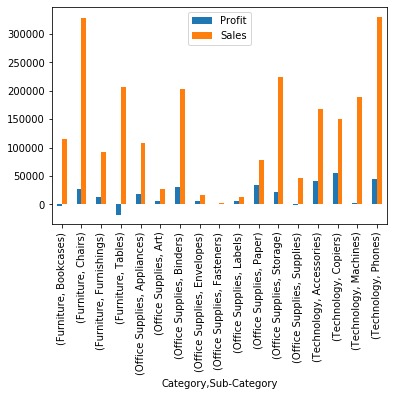

In [17]:
sector["Profit","Sales"].sum().plot.bar()

In [18]:
sector.median()

Sales  Quantity  Discount     Profit
Category        Sub-Category                                           
Furniture       Bookcases      306.82025         3       0.2    4.13330
                Chairs         362.13600         3       0.2   13.31760
                Furnishings     41.96000         3       0.0    9.10200
                Tables         447.84000         3       0.3  -31.37220
Office Supplies Appliances      82.69000         3       0.0   17.44650
                Art             15.50400         3       0.0    3.72360
                Binders         18.56000         3       0.2    3.97710
                Envelopes       29.04600         3       0.0   12.71835
                Fasteners       10.58400         4       0.0    2.84160
                Labels          14.94000         3       0.0    6.87140
                Paper           26.72000         3       0.0   11.54320
                Storage        113.92800         3       0.0    7.75700
                Supplies        27.93000         3       0.0    3.95930
Technology      Accessories    100.00000         3       0.0   21.00000
                Copiers       1099.98000         3       0.2  332.99420
                Machines       599.98500         3       0.2   38.99740
                Phones         209.97000         3       0.2   23.52480

# Visualisation by correlational matrix and Heat map  

In [19]:
result=data.corr()
result

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


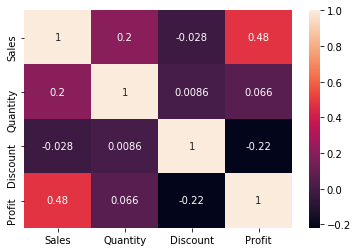

In [20]:
sns.heatmap(result,annot=True)